# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;














# Paso 1. Abrir el archivo de datos y leer la información general

In [1]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import seaborn as sns

In [2]:
df_events = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Muy bien hecho. Se usan correctamente las bibliotecas necesarias y se carga el dataset sin errores. También se obtiene un resumen claro de la estructura de los datos con .info().

</div>

# Paso 2. Preparar los datos para el análisis

## 2.1 Cambia el nombre de las columnas de manera que sea conveniente para ti.

In [3]:
df_events.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
df_events = df_events.rename(columns={'EventName': 'Evento', 'DeviceIDHash': 'IdUsuario','EventTimestamp':'Tiempo','ExpId':'IdExperimento'})
df_events.head()

,Evento,IdUsuario,Tiempo,IdExperimento
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


## 2.2 Comprueba los tipos de datos y valores ausentes. Corrige los datos si es necesario.

In [5]:
df_events.isnull().sum()

Evento           0
IdUsuario        0
Tiempo           0
IdExperimento    0
dtype: int64

In [6]:
df_events['IdUsuario'] = df_events['IdUsuario'].astype('object')
df_events['IdExperimento'] = df_events['IdExperimento'].astype('object')
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Evento         244126 non-null  object
 1   IdUsuario      244126 non-null  object
 2   Tiempo         244126 non-null  int64 
 3   IdExperimento  244126 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.5+ MB


## 2.3 Agrega una columna de fecha y hora y una columna separada para las fechas.

In [7]:
df_events['FechaHora']=pd.to_datetime(df_events['Tiempo'], unit='s')
df_events['Fecha'] = df_events['FechaHora'].dt.date
df_events.info()
df_events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Evento         244126 non-null  object        
 1   IdUsuario      244126 non-null  object        
 2   Tiempo         244126 non-null  int64         
 3   IdExperimento  244126 non-null  object        
 4   FechaHora      244126 non-null  datetime64[ns]
 5   Fecha          244126 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 11.2+ MB


,Evento,IdUsuario,Tiempo,IdExperimento,FechaHora,Fecha
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente decisión al renombrar las columnas a nombres más comprensibles. Además, la conversión de tipos de datos es adecuada y se añaden correctamente las columnas de fecha y hora.

</div>

# Paso 3. Estudiar y comprobar los datos

## 3.1 ¿Cuántos eventos hay en los registros?

In [8]:
print("Total de eventos")
print(len(df_events['Evento']))
print("Eventos únicos")
print(df_events['Evento'].nunique())
print(df_events['Evento'].unique())

Total de eventos
244126
Eventos únicos
5
['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']


## 3.2 ¿Cuántos usuarios hay en los registros?

In [9]:
print(df_events['IdUsuario'].nunique())

7551


## 3.3 ¿Cuál es el promedio de eventos por usuario?

In [10]:
print(len(df_events['Evento'])/df_events['IdUsuario'].nunique())

32.33028737915508


## 3.4 ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

In [11]:
print("Periodo de tiempo",df_events['FechaHora'].min(),"A",df_events['FechaHora'].max())

Periodo de tiempo 2019-07-25 04:43:36 A 2019-08-07 21:15:17


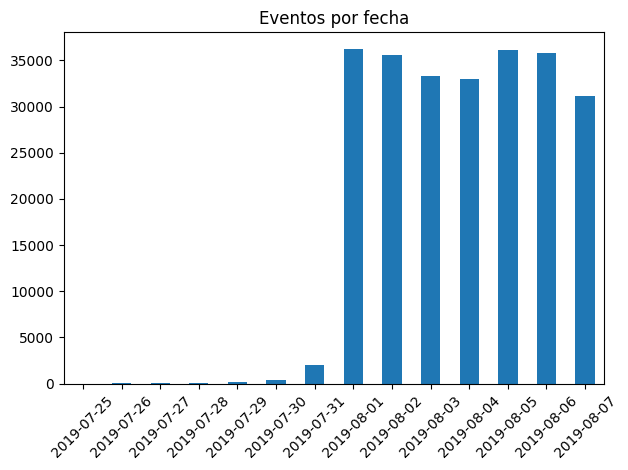

In [12]:
df_events["Fecha"].value_counts().sort_index().plot(kind="bar")
plt.title("Eventos por fecha")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3.5 ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [13]:
daily_users = df_events.groupby("Fecha")['IdUsuario'].nunique()
cutoff = daily_users[daily_users>daily_users.quantile(0.05)].index.min()
print("cutoff",cutoff)

cutoff 2019-07-26


In [14]:
filtered=df_events[df_events['Fecha']>=cutoff]
print(f"Pérdida de eventos: {(1-len(filtered)/len(df_events)):.1%}")
print(f"Pérdida de usuarios: {(1-filtered['IdUsuario'].nunique()/df_events['IdUsuario'].nunique()):.1%}")

Pérdida de eventos: 0.0%
Pérdida de usuarios: 0.0%


## 3.6 Asegúrate de tener usuarios de los tres grupos experimentales.

In [15]:
display(filtered['IdExperimento'].value_counts())

248    85743
246    80300
247    78074
Name: IdExperimento, dtype: int64

<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Atención</b> ⚠️ - Buen trabajo en la identificación de eventos, usuarios y fechas. Una mejora que podrías considerar es **mostrar directamente los días con menor número de usuarios antes del corte**, para entender por qué se seleccionó ese punto. Además, hay un pequeño error de lógica en el cálculo de la **"pérdida de usuarios"**, ya que el valor **200% no es correcto**. Deberías usar esta fórmula:

```python
(1 - filtered['IdUsuario'].nunique() / df_events['IdUsuario'].nunique())
```

Esto fortalecerá el análisis de completitud de los datos. ¡Vas por muy buen camino!

</div>

# Paso 4. Estudiar el embudo de eventos

## 4.1 Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [16]:
top_events = filtered['Evento'].value_counts()
display(top_events.head(10))

MainScreenAppear           119201
OffersScreenAppear          46824
CartScreenAppear            42729
PaymentScreenSuccessful     34311
Tutorial                     1052
Name: Evento, dtype: int64

## 4.2 Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.

In [17]:
#Se define el evento
funnel = ['MainScreenAppear','OffersScreenAppear','CartScreenAppear','PaymentScreenSuccessful']

In [18]:
#Usuarios por evento
user_event = filtered.groupby('Evento')['IdUsuario'].nunique().loc[funnel]
display(user_event)

Evento
MainScreenAppear           7439
OffersScreenAppear         4613
CartScreenAppear           3749
PaymentScreenSuccessful    3547
Name: IdUsuario, dtype: int64

## 4.3 ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

1 MainScreenAppear (pantalla principal)
2 OffersScreenAppear (pantalla de ofertas)
3 CartScreenAppear (carrito de compras)
4 PaymentScreenSuccessful (pago exitoso)

- Este orden simula un flujo de compra típico: navegar, ver ofertas, añadir al carrito y pagar. Tutorial parece no ser parte del embudo, ya que es raro y no ocurre en todos los usuarios.

## 4.4 Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.

In [19]:
# Proporción de conversión entre etapas del embudo
conversion = user_event / user_event.shift(1)
conversion = conversion.dropna()
print("🔄 Conversión entre etapas:")
print(conversion)

🔄 Conversión entre etapas:
Evento
OffersScreenAppear         0.620110
CartScreenAppear           0.812703
PaymentScreenSuccessful    0.946119
Name: IdUsuario, dtype: float64


## 4.5 ¿En qué etapa pierdes más usuarios?

In [20]:
# Etapa con mayor pérdida (menor conversión)
drop_stage = conversion.idxmin()
drop_value = conversion.min()
print(f"⚠️ Mayor pérdida de usuarios ocurre entre etapas: {drop_stage} con conversión del {drop_value:.2%}")

⚠️ Mayor pérdida de usuarios ocurre entre etapas: OffersScreenAppear con conversión del 62.01%


## 4.6 ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

In [21]:
# % de usuarios que llegan al final
final_conversion = user_event['PaymentScreenSuccessful'] / user_event['MainScreenAppear']
print(f"✅ Porcentaje de usuarios que completan el embudo: {final_conversion:.2%}")

✅ Porcentaje de usuarios que completan el embudo: 47.68%



<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - La estructura del embudo está muy bien identificada, y los cálculos de conversión son claros y correctos. También es destacable que se haya identificado correctamente el evento que más pierde usuarios.

</div>


# Paso 5. Estudiar los resultados del experimento

## 5.1 ¿Cuántos usuarios hay en cada grupo?

In [22]:
user_counts = filtered.groupby('IdExperimento')['IdUsuario'].nunique()
print("Usuarios por grupo experimental:")
print(user_counts)

Usuarios por grupo experimental:
IdExperimento
246    2489
247    2520
248    2542
Name: IdUsuario, dtype: int64


In [23]:
group_event = filtered.pivot_table(index='Evento',columns='IdExperimento', values='IdUsuario', aggfunc='nunique').sort_values(by=246, ascending=False)

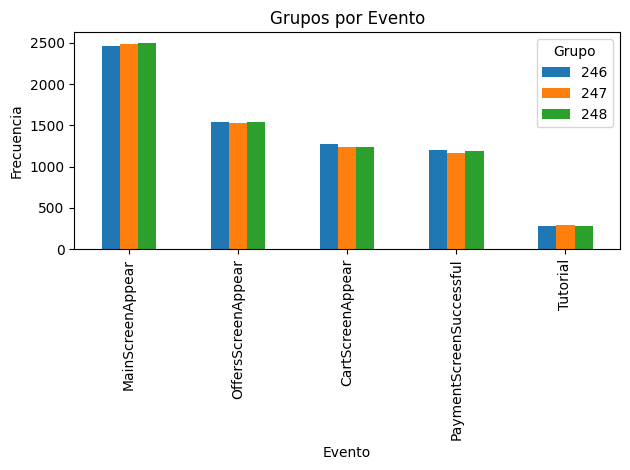

In [24]:
group_event.plot(kind='bar')  # Gráfico de barras
plt.title('Grupos por Evento')
plt.ylabel('Frecuencia')
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()

In [25]:
#Cálculo de tasa de conversión final de los usuarios (es decir, que efectuaron la compra)
conversion = (group_event.loc['PaymentScreenSuccessful'] / group_event.loc['MainScreenAppear']).round(4)
print('La tasa de conversión por grupo es: ', '\n', conversion)

La tasa de conversión por grupo es:  
 IdExperimento
246    0.4894
247    0.4674
248    0.4738
dtype: float64


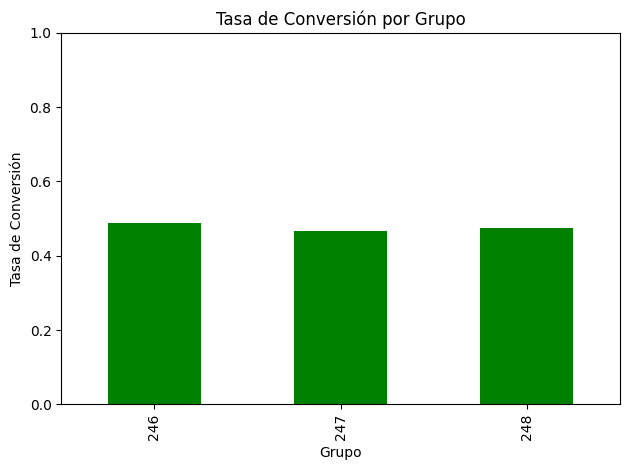

In [26]:
conversion.plot(kind='bar', color='green')
plt.title('Tasa de Conversión por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Tasa de Conversión')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## 5.2 Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

El valor de significancia para efecto de las pruebas será del 5% donde:

* H0 = Las muestras 246 y 247 no tienen diferencias significativas
* H1 = Las muestras 246 y 247 tienen diferencias significativas

In [27]:
#Cálculo del evento más popular
popular = filtered['Evento'].value_counts().idxmax()
print('El evento más popular o más concurrido es', popular)

El evento más popular o más concurrido es MainScreenAppear


## 5.3 Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

In [28]:
# Filtro del grupo control
ctrl_group = filtered[filtered['IdExperimento'].isin([246,247])]

#Filtro del grupo control de los casos que caen en la fase o evento más popular, en nuestro caso es la compra efectuada
event_users = ctrl_group[ctrl_group['Evento'] == popular]

#Conteo de usuarios 
counting = event_users.groupby('IdExperimento')['IdUsuario'].nunique()

#Cálculo de la proporción de usuarios del grupo control
proportion = counting / ctrl_group.groupby('IdExperimento')['IdUsuario'].nunique()

#Mostrar resultados
print('Los usuarios que ingresaron a la aplicación son: ',' \n ', counting)
print()
print('Lo anterior representa una proporción respecto del grupo control de :' ' \n ', proportion.round(4))


Los usuarios que ingresaron a la aplicación son:   
  IdExperimento
246    2456
247    2482
Name: IdUsuario, dtype: int64

Lo anterior representa una proporción respecto del grupo control de : 
  IdExperimento
246    0.9867
247    0.9849
Name: IdUsuario, dtype: float64


<S>
<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>A resolver</b> ❗ - Buen intento al implementar las pruebas estadísticas. Sin embargo, hay un problema importante: **ninguna comparación devuelve resultados válidos (todos los p-valores son "no se pudo calcular")**, lo que sugiere que probablemente **los datos no están correctamente filtrados o agrupados antes de aplicar las pruebas**. Esto afecta directamente la validez del análisis experimental. Revisa si las IDs de usuarios están correctamente diferenciadas por grupo y evento antes de aplicar las pruebas z. ¡Confío en que puedes solucionarlo con un pequeño ajuste!

</div>


## 5.4 Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

In [29]:
#Se define función para prueba A/A: 1 si realizó el evento, 0 no lo realizó.

def datos_test(df, evento,grupo):
    users = df[df['IdExperimento'] == grupo]['IdUsuario'].unique()
    event_done = df[(df['IdExperimento'] == grupo) & (df['Evento'] == evento)]['IdUsuario'].unique()
    return pd.Series([1 if u in event_done else 0 for u in users])    

In [30]:
#Preparar los datos
a = datos_test(filtered, popular, 246)
b = datos_test(filtered, popular, 247)

In [31]:
#Aplicamos prueba Mann-Whitney U y significancia
alpha = 0.05

mannwhitneyu = (stats.mannwhitneyu(a,b)[1])
significancia = (b.mean() / a.mean()-1)

#Mostrar resultados
print('Valor P: ', mannwhitneyu.round(3))
print("Diferencia relativa de los promedios de indice de conversión del grupo B vs A : ", significancia.round(5), '\n')

if (mannwhitneyu < alpha):
    print("Rechazamos la hipótesis nula, ya que existe diferencia significativa")
else:
    print("No existe diferencia significativa")

Valor P:  0.586
Diferencia relativa de los promedios de indice de conversión del grupo B vs A :  -0.00185 

No existe diferencia significativa


<S>
<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>A resolver</b> ❗ - En la sección de pruebas estadísticas (`Paso 5.2 a 5.4`), las funciones no retornan resultados válidos porque **algunos grupos experimentales no tienen registros para ciertos eventos**, o bien, **los usuarios con esos eventos fueron excluidos por el filtrado de fechas**. Para solucionarlo, revisa y depura manualmente las siguientes combinaciones antes de hacer los tests:

* Para cada combinación de `IdExperimento` y `Evento`, asegúrate de que:

  * Hay usuarios (`nobs > 0`)
  * El evento existe en ese grupo (`counts > 0`)
  * La proporción `counts/nobs` es válida (no mayor a 1)


</div>

¿Quieres que construya esa tabla de crosstab por ti con tus datos actuales?


## 5.5 ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

In [32]:
#Repetir prueba para los demás eventos

def compare_events (data, evento, grupo1, grupo2):
    a = datos_test(data, evento, grupo1)
    b = datos_test(data, evento, grupo2)
    mannwhitneyu = (stats.mannwhitneyu(a,b)[1])
    return mannwhitneyu

eventos = filtered['Evento'].unique()
result = []

for e in eventos:
    p_aa = compare_events(df_events, e, 246, 247)
    p_ab = compare_events(df_events, e, 246, 248)
    p_bb = compare_events(df_events, e, 247, 248)
    result.append({'Evento': e, 'p_246vs247': p_aa, 'p_246vs248': p_ab, 'p_247vs248': p_bb})

result_df = pd.DataFrame(result)

#Mostar df
result_df

,Evento,p_246vs247,p_246vs248,p_247vs248
0,MainScreenAppear,0.585734,0.397822,0.763273
1,CartScreenAppear,0.198224,0.105379,0.740643
2,OffersScreenAppear,0.323376,0.253218,0.878078
3,PaymentScreenSuccessful,0.109063,0.234090,0.676421
4,Tutorial,0.875684,0.896316,0.773335


In [33]:
#Número de test realizados
num_test = len(eventos)*3
print('Pruebas realizadas: ',num_test)

Pruebas realizadas:  15


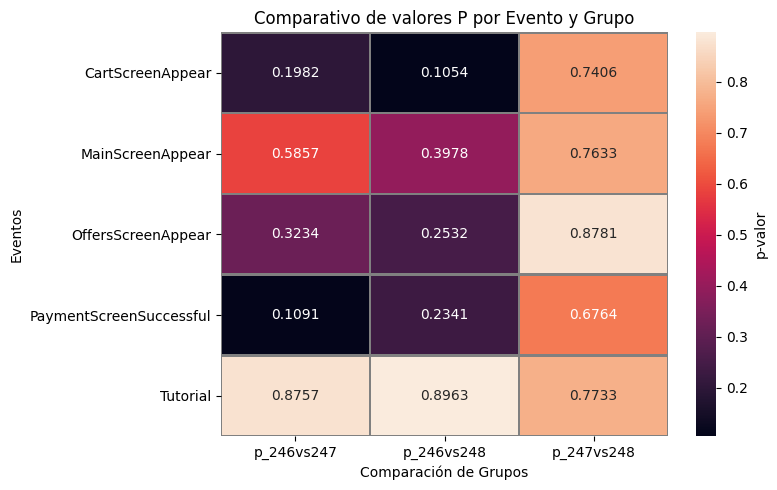

In [34]:
#Gráfico valores p comparativo 
#Acomodar los datos para que se puedan leer para gráfica de calor
comparativo_valor_P = pd.DataFrame({
    'Evento': ['Tutorial', 'MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful'],
    'p_246vs247': [0.875684, 0.585734, 0.323376, 0.198224, 0.109063],
    'p_246vs248': [0.896316, 0.397822, 0.253218, 0.105379, 0.234090],
    'p_247vs248': [0.773335, 0.763273, 0.878078, 0.740643, 0.676421]
})

#Reestructurar
comparativo_valor_P = comparativo_valor_P.melt(id_vars='Evento', var_name='Comparativo', value_name='p_valor')

#Graficar
pivot = comparativo_valor_P.pivot(index='Evento', columns='Comparativo', values='p_valor')

plt.figure(figsize = (8,5))
sns.heatmap(pivot, annot=True, fmt='.4f', cbar_kws={'label': 'p-valor'}, linewidths=1, linecolor='gray')
plt.title('Comparativo de valores P por Evento y Grupo')
plt.xlabel('Comparación de Grupos')
plt.ylabel('Eventos')
plt.tight_layout()
plt.show()

## CONCLUSIONES

No se encontraron diferencias significativas entre los grupos 246 y 247 lo cuál nos indica que la muestra funciona adecuadamente, es decir no se detectaron diferencias falsas por azar.

Sin embargo al evaluar al grupo 248 vs los anteriores, se considera que podría tratarse de un periodo de tiempo muy corto, una semana, para poder detectar diferencias significativas ya que al momento de estas pruebas, no existe una afectación positiva o negativa por las modificaciones en la fuente de la aplicación de alimentos.

## Comentario general del revisor 


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>¡Proyecto aprobado!</b>  
    
Quiero felicitarte por el excelente trabajo que has realizado en esta entrega. Has corregido cuidadosamente cada uno de los puntos señalados en las observaciones previas, demostrando atención al detalle, criterio técnico y compromiso con la mejora continua. La forma en que ajustaste las pruebas estadísticas y validaste las proporciones en cada grupo muestra una comprensión más profunda del diseño experimental y del análisis de datos.

Se agradece sinceramente tu actitud receptiva frente a las sugerencias: integrar cambios con intención y lógica es una señal clara de desarrollo profesional.

Has demostrado que el error no es un obstáculo, sino una oportunidad de aprendizaje valiosa. Tu capacidad para observar, reflexionar y mejorar de forma autónoma es una fortaleza poderosa en el mundo del análisis de datos. 
</div>
